# task2_step3_analysis.py: Visualize results from reviews_analyzed.csv
# Purpose: Summarize sentiment, keywords, and themes

# # Task 2, Step 3: Analysis
# This script visualizes the results of the sentiment, keyword, and theme analysis
# from `data/processed/reviews_analyzed.csv`, produced by `task2_step3_pipeline.py`.
# It generates:
# - A bar plot of sentiment distribution by bank.
# - A bar plot of the top 10 keywords across all reviews.
# - A printed summary of themes per bank.
#
# ## Setup
# Run this script after executing `task2_step3_pipeline.py`. Ensure `requirements.txt`
# dependencies (`pandas`, `matplotlib`, `seaborn`) are installed in your `venv`:
# ```bash
# pip install -r requirements.txt
# ```
#
# ## Output
# - Plots saved to `data/processed/sentiment_distribution.png` and `data/processed/top_keywords.png`.
# - Themes printed below.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [7]:
# Load data
df = pd.read_csv('../data/processed/reviews_analyzed.csv', encoding='utf-8')
print("Loaded data with shape:", df.shape)


Loaded data with shape: (1184, 10)


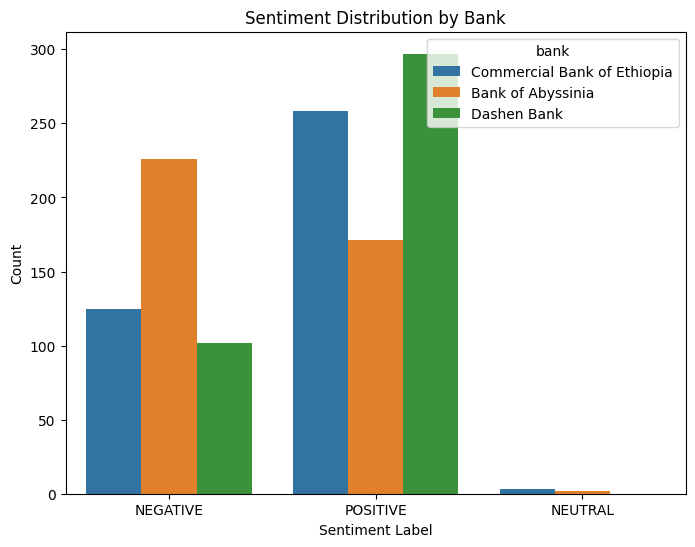

In [8]:
# ## Sentiment Distribution
# The following plot shows the count of positive, negative, neutral, and unknown sentiments for each bank.

# Sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sentiment_label', hue='bank')
plt.title('Sentiment Distribution by Bank')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
os.makedirs('data/processed', exist_ok=True)
plt.savefig('data/processed/sentiment_distribution.png')
plt.show()

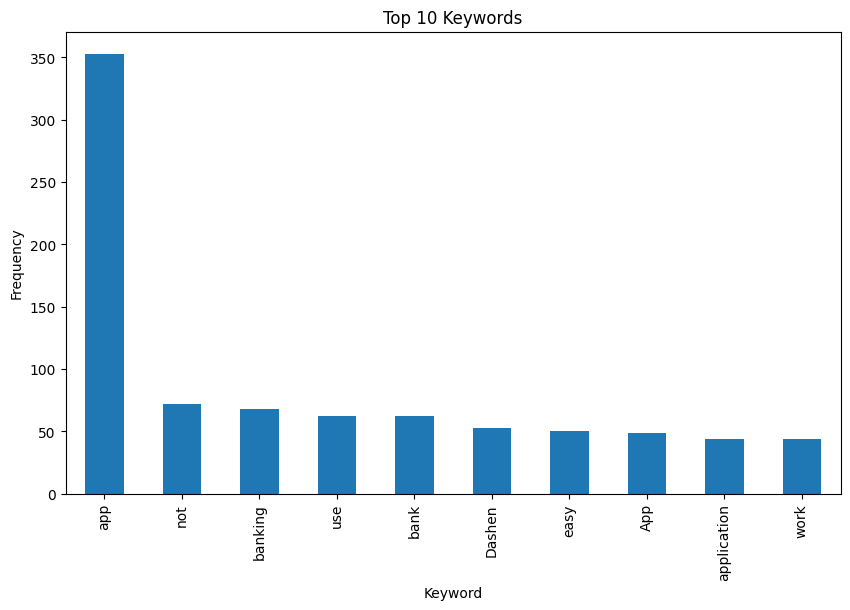

In [9]:
# ## Top Keywords
# The following plot shows the 10 most frequent keywords extracted from the reviews.

# Top keywords
keywords = [kw for kws in df['keywords'].apply(eval) for kw in kws]
top_keywords = pd.Series(keywords).value_counts().head(10)
plt.figure(figsize=(10, 6))
top_keywords.plot(kind='bar')
plt.title('Top 10 Keywords')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.savefig('data/processed/top_keywords.png')
plt.show()

In [10]:
# ## Themes per Bank
# The following output lists the proposed themes and associated keywords for each bank.

# Themes per bank
for bank in df['bank'].unique():
    themes = eval(df[df['bank'] == bank]['themes'].iloc[0])
    print(f"{bank} Themes:")
    for theme, kws in themes:
        print(f"  - {theme}: {kws}")

Commercial Bank of Ethiopia Themes:
  - App Usability: ['app', 'application']
  - Performance Issues: ['fast']
  - Other Feedback: ['CBE', 'not', 'use', 'screenshot', 'bank']
Bank of Abyssinia Themes:
  - App Usability: ['app', 'application', 'App']
  - Performance Issues: ['slow']
  - Other Feedback: ['not', 'work', 'bank', 'use', 'mobile']
Dashen Bank Themes:
  - App Usability: ['app', 'App', 'application']
  - Performance Issues: ['fast']
  - Other Feedback: ['Dashen', 'banking', 'use', 'Super', 'bank']
